In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from math import log
#warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv(filepath_or_buffer = 'Data/combined_data_train.csv')
test_data = pd.read_csv(filepath_or_buffer = 'Data/combined_data_test.csv')

In [3]:
train_data.drop(['Ad set name','Date'], axis=1, inplace = True)
test_data.drop(['Ad set name','Date'], axis=1, inplace = True)

In [4]:
'''
One hot encoding
'''
def one_hot(data):
    for col_name in data.columns:
        if(data[col_name].dtype == 'object'):
            one_hot = pd.get_dummies(data[col_name])
            data.drop([col_name], axis = 1, inplace = True)
            data = data.join(one_hot)
    return data

train_data = one_hot(train_data)
test_data = one_hot(test_data)

In [5]:
'''
train, validation split
'''
train_data = train_data[int(len(train_data)*0.7):]
val_data = train_data[:int(len(train_data)*0.7)]

In [6]:
train_data_Y = train_data['Return on ad spend (ROAS)']
train_data_X = train_data.drop('Return on ad spend (ROAS)', axis=1)

val_data_Y = val_data['Return on ad spend (ROAS)']
val_data_X = val_data.drop('Return on ad spend (ROAS)', axis=1)

test_data_Y = test_data['Return on ad spend (ROAS)']
test_data_X = test_data.drop('Return on ad spend (ROAS)', axis=1)

In [7]:
'''
Finds RMSE
'''
def RMSE(y_predicted,y):
    n = len(y_predicted)
    diff = [m - n for m,n in zip(y_predicted,y)]
    diff = [x**2 for x in diff]
    diff = sum(diff)
    diff = diff/n
    diff = diff**0.5
    return diff

In [8]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

C:\Users\zhs07\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


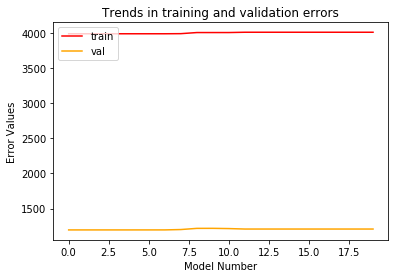

best lasso rmse: 1195.3631417738889


In [9]:
'''
Testing lasso regression
'''

best_lasso_model = None
best_lasso_rmse = float('Inf')

train_rmse_list = []
val_rmse_list = []

lambda_list = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000,10000000000,
               100000000000,1000000000000,10000000000000]

for l in lambda_list:
    Lasso_Model = Lasso(alpha = l, max_iter = 1000000)
    Lasso_Model.fit(train_data_X, train_data_Y)
    current_val_rmse = RMSE(Lasso_Model.predict(val_data_X),val_data_Y)
    current_train_rmse = RMSE(Lasso_Model.predict(train_data_X),train_data_Y)
    val_rmse_list.append(current_val_rmse)
    train_rmse_list.append(current_train_rmse)
    
    if current_val_rmse < best_lasso_rmse:
        best_lasso_rmse = current_val_rmse
        best_lasso_model = Lasso_Model

lambda_list = [log(x,10) for x in lambda_list]
plt.plot(list(range(len(train_rmse_list))),train_rmse_list,label = 'train',color = 'red')
plt.plot(list(range(len(train_rmse_list))),val_rmse_list,label = 'val', color = 'orange')
plt.xlabel('Model Number')
plt.ylabel('Error Values')
plt.title('Trends in training and validation errors')
plt.legend(loc='upper left')
plt.show()
print('best lasso rmse: ' + str(best_lasso_rmse))

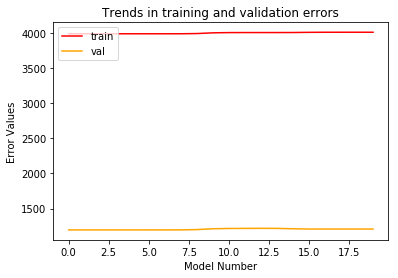

best lasso rmse: 1195.3631417338358


In [10]:
'''
Testing ridge regression
'''

best_ridge_model = None
best_ridge_rmse = float('Inf')

train_rmse_list = []
val_rmse_list = []

lambda_list = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000,10000000000,
               100000000000,1000000000000,10000000000000]

for l in lambda_list:
    Ridge_Model = Ridge(alpha = l, max_iter = 100000)
    Ridge_Model.fit(train_data_X, train_data_Y)
    current_val_rmse = RMSE(Ridge_Model.predict(val_data_X),val_data_Y)
    current_train_rmse = RMSE(Ridge_Model.predict(train_data_X),train_data_Y)
    val_rmse_list.append(current_val_rmse)
    train_rmse_list.append(current_train_rmse)
    
    if current_val_rmse < best_ridge_rmse:
        best_ridge_rmse = current_val_rmse
        best_ridge_model = Ridge_Model

lambda_list = [log(x,10) for x in lambda_list]
plt.plot(list(range(len(train_rmse_list))),train_rmse_list,label = 'train',color = 'red')
plt.plot(list(range(len(train_rmse_list))),val_rmse_list,label = 'val', color = 'orange')
plt.xlabel('Model Number')
plt.ylabel('Error Values')
plt.title('Trends in training and validation errors')
plt.legend(loc='upper left')
plt.show()
print('best ridge rmse: ' + str(best_ridge_rmse))

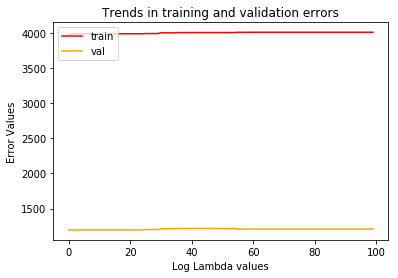

best lasso rmse: 1195.3631831681703


In [11]:
'''
Testing elastic net regression
'''

best_net_model = None
best_net_rmse = float('Inf')

train_rmse_list = []
val_rmse_list = []

lambda_list = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000,10000000000,
               100000000000,1000000000000,10000000000000]
l1_ratio_list = [0.1,0.3,0.5,0.7,0.9]

for l in lambda_list:
    for ratio in l1_ratio_list:
        Net_Model = ElasticNet(alpha = l, max_iter = 1000000)
        Net_Model.fit(train_data_X, train_data_Y)
        current_val_rmse = RMSE(Net_Model.predict(val_data_X),val_data_Y)
        current_train_rmse = RMSE(Net_Model.predict(train_data_X),train_data_Y)
        val_rmse_list.append(current_val_rmse)
        train_rmse_list.append(current_train_rmse)

        if current_val_rmse < best_net_rmse:
            best_net_rmse = current_val_rmse
            best_net_model = Net_Model

lambda_list = [log(x,10) for x in lambda_list]
plt.plot(list(range(len(train_rmse_list))),train_rmse_list,label = 'train',color = 'red')
plt.plot(list(range(len(train_rmse_list))),val_rmse_list,label = 'val', color = 'orange')
plt.xlabel('Log Lambda values')
plt.ylabel('Error Values')
plt.title('Trends in training and validation errors')
plt.legend(loc='upper left')
plt.show()
print('best ridge rmse: ' + str(best_net_rmse))

In [14]:
'''
Conclusion, Lasso regression is the best one so far.
'''
best_net_model.fit(train_data_X, train_data_Y)
RMSE(best_net_model.predict(test_data_X), test_data_Y)

8709.212370925454